In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

In [2]:
from michigan.fusion import Fusion
from michigan.dataprep import Data
import matplotlib.pyplot as plt
from nansat import Nansat, Domain
from michigan.michigan import MichiganProcessing
from michigan.plotbox import show_it
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import glob
import os

=>michigan.grd<=


<IPython.core.display.Javascript object>


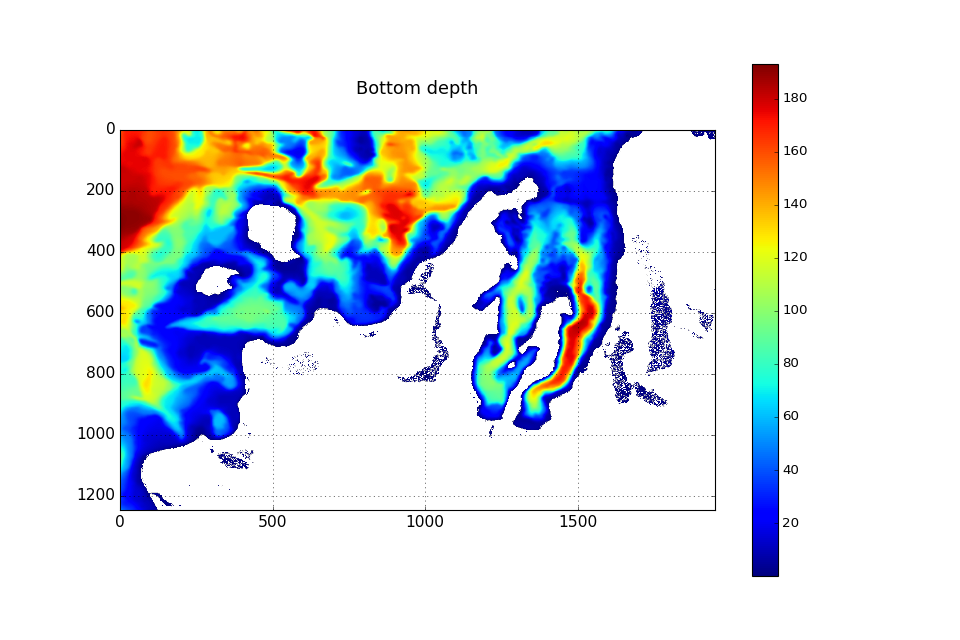

In [3]:
base = MichiganProcessing('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160509_129_mumml2_s2l2.nc')
bottom = base.get_bottom()
show_it(bottom, name='Bottom depth', size=(12,8))

# Atm. correction

In [10]:
# MODIS-Aqua
m_mumm = Nansat('/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/MODISa/LAC_OC_MUMM/A2016208192000.nc_mumm_reprojected.nc')
m_mumm.reproject(Data.sbd_dom)
m_st = Nansat('/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/MODISa/A2016208192000.L2_LAC_OC.nc_reprojected.nc')
m_st.reproject(Data.sbd_dom)

<IPython.core.display.Javascript object>


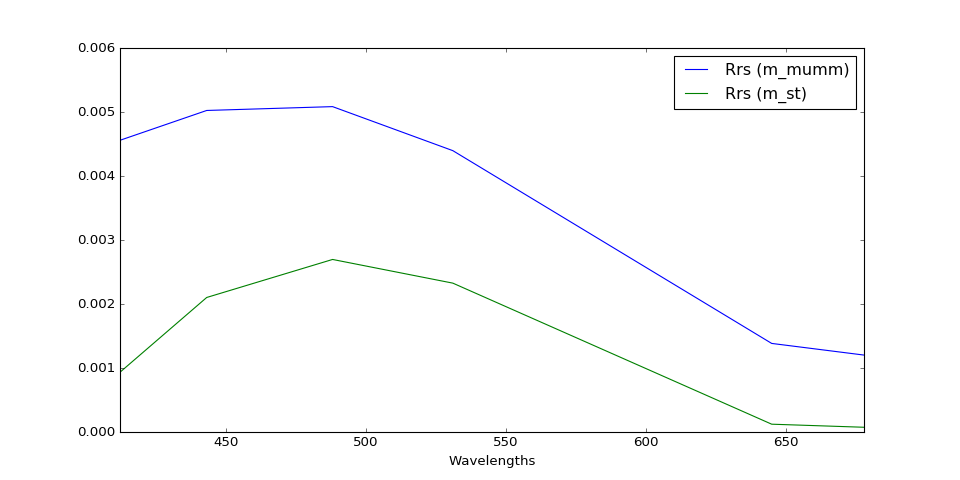

In [12]:
yx = (248, 38)

m_mumm_data_r, m_mumm_data_w = get_r(m_mumm, coords=yx, )
m_mumm_data_fr = pd.DataFrame({'Wavelengths': m_mumm_data_w, 'Rrs (m_mumm)': m_mumm_data_r})

m_st_data_r, m_st_data_w = get_r(m_st, coords=yx)
m_st_data_fr = pd.DataFrame({'Wavelengths': m_st_data_w, 'Rrs (m_st)': m_st_data_r})

m_all = pd.merge(m_mumm_data_fr, m_st_data_fr, 'right', on='Wavelengths')
m_all.plot(x='Wavelengths',figsize=(12,6))

# Fusion

In [8]:
def get_r(obj, coords, r_type='Rrs_', sensor='modis'):
    y, x = coords
    if sensor is 'modis':
        wavelengths = sorted(Data.wavelengths['modis']['1x1km_bands'])
    else:
        wavelengths = sorted(Data.wavelengths['sentinel2'].values())
    
    band_numbers = []
    for wavelength in wavelengths:
        try:
            band_numbers.append(obj._get_band_number(r_type + str(wavelength)))
        except:
            pass
    
    r_list = [obj[band][y][x] for band in band_numbers]
    return r_list, wavelengths

In [20]:
mfile = '/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/MODISa/LAC_OC_MUMM/A2016248183000.nc_mumm_reprojected.nc'
sfile = '/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/sentinel2/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160904T205606_R126_V20160903T164322_20160903T164911.SAFE_reprojected.nc'

fuse = Fusion(mfile, sfile)
n_lores, n_hires = fuse.fusion(m_wavelengths='1x1km_bands')
n_hires.export('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160904_mumml2_s2l2.nc')

=>michigan.grd<=
Creating training datasets from input data ...  Number of training vectors: 2475
OK!
Training network in 20 iterations ...
Train network
### -> RMSE
000 -> 0.204
001 -> 0.204
002 -> 0.196
003 -> 0.196
004 -> 0.191
005 -> 0.191
006 -> 0.185
007 -> 0.179
008 -> 0.171
009 -> 0.165
010 -> 0.162
011 -> 0.159
012 -> 0.157
013 -> 0.157
014 -> 0.156
015 -> 0.156
016 -> 0.160
017 -> 0.153
018 -> 0.153
019 -> 0.151
Training network - OK!
Saving network to file ... OK!
Applying network in 7 threads...
Feed 0 thread
Feed 1 thread
Feed 2 thread
Feed 3 thread
Feed 4 thread
Feed 5 thread
Feed 6 thread
Apply network
OK!
Creating training datasets from input data ...  Number of training vectors: 2472
OK!
Training network in 20 iterations ...
Train network
### -> RMSE
000 -> 0.192
001 -> 0.190
002 -> 0.181
003 -> 0.173
004 -> 0.169
005 -> 0.166
006 -> 0.164
007 -> 0.165
008 -> 0.167
009 -> 0.164
010 -> 0.165
011 -> 0.161
012 -> 0.161
013 -> 0.162
014 -> 0.161
015 -> 0.158
016 -> 0.157
0

In [9]:
list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/fused_data/*'))

['/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160904_mumml2_s2l2.nc',
 '/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160815_227_mumml2_s2l2.nc',
 '/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160726_208_mumml2_s2l2.nc',
 '/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160705_187_mumml2_s2l2.nc',
 '/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160509_129_mumml2_s2l2.nc']

<IPython.core.display.Javascript object>


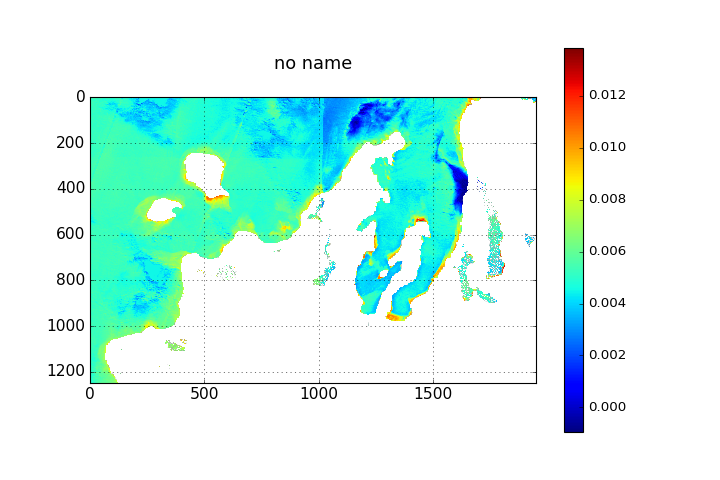

In [9]:
%matplotlib nbagg
show_it(n_hires[3])

In [13]:
cpa_proc = MichiganProcessing('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160509_mumml2_s2l2.nc')
cpa = cpa_proc.boreali_processing()

=>michigan.grd<=
wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrs_


/home/artemm/miniconda/envs/niersc/lib/python2.7/site-packages/boreali/boreali.py:295: RuntimeWarning: invalid value encountered in less
  negativePixels = rrsw.min(axis=0) < 0


Pixels x bands to process:  (1202445, 6)
launch shallow
launch shallow
launch shallow
launch shallow
spent:  678.401711941


<IPython.core.display.Javascript object>


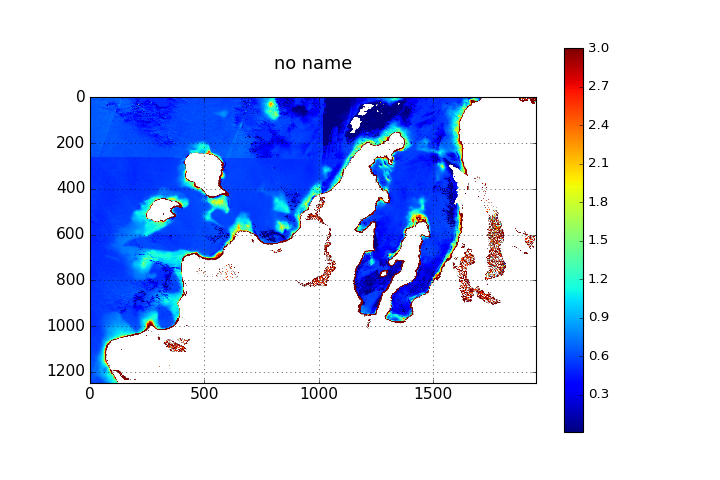

In [16]:
show_it(cpa['chl'], limits=(0.01, 3.))